Name: Tanmay Patil

Roll No:21102B0011

Div: BE CMPN B

Subject: ML Lab

Topic: Experiment 1 Predicting Housing Prices Using Linear Regression

Github link:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
print(df);

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.shape

(20640, 10)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [46]:
X = df.drop(['median_house_value'], axis = 1)

In [47]:
unique_values = X['ocean_proximity'].unique()
print("Unique values:", unique_values)

# Step 2: Create a mapping
value_map = {category: float(i) for i, category in enumerate(unique_values, 1)}
print("Value map:", value_map)

# Step 3: Replace the categorical data
X['ocean_proximity'] = X['ocean_proximity'].map(value_map)
print("Updated DataFrame:\n", X)

Unique values: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Value map: {'NEAR BAY': 1.0, '<1H OCEAN': 2.0, 'INLAND': 3.0, 'NEAR OCEAN': 4.0, 'ISLAND': 5.0}
Updated DataFrame:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39

In [48]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [49]:
Y = df['median_house_value']
print(Y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [50]:
X.shape

(20433, 9)

In [51]:
Y.shape

(20433,)

In [52]:
temp = df.drop(['ocean_proximity'], axis = 1)

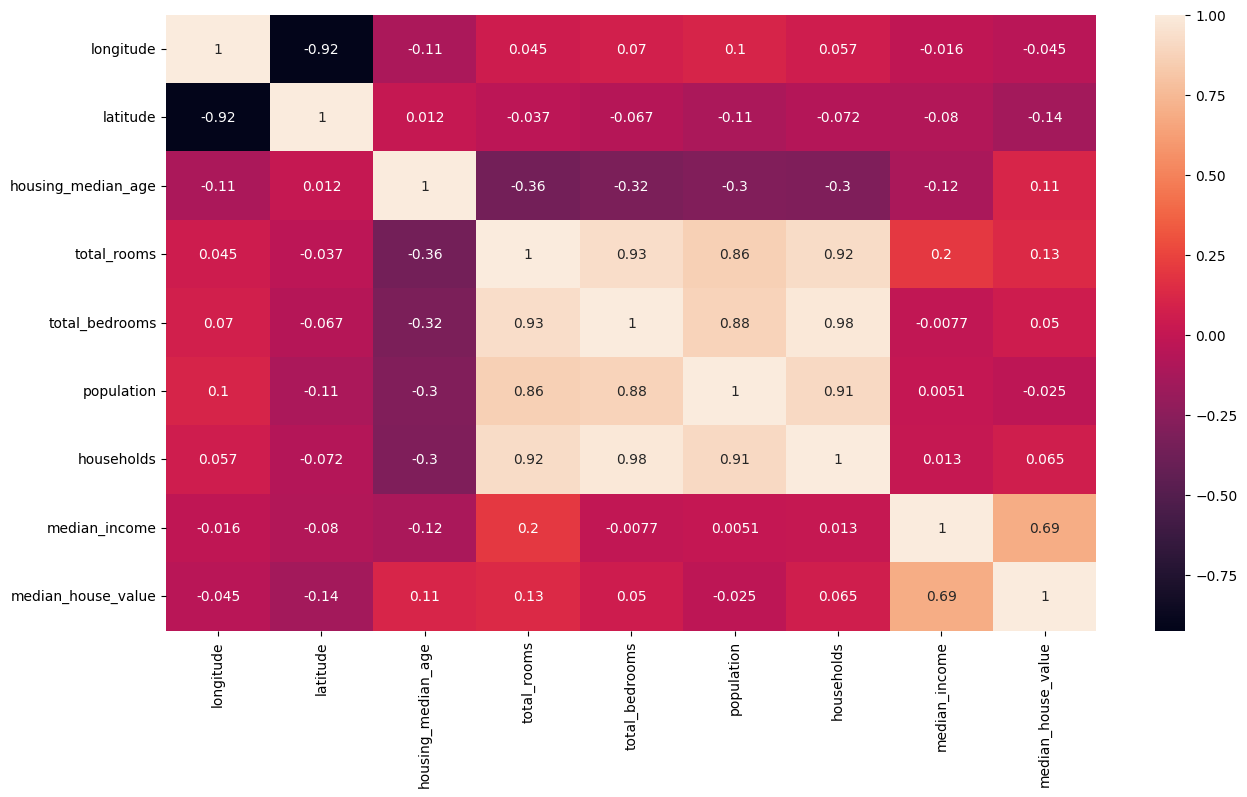

In [53]:
plt.figure(figsize=(15, 8))
sns.heatmap(temp.corr(), annot = True)
plt.show()

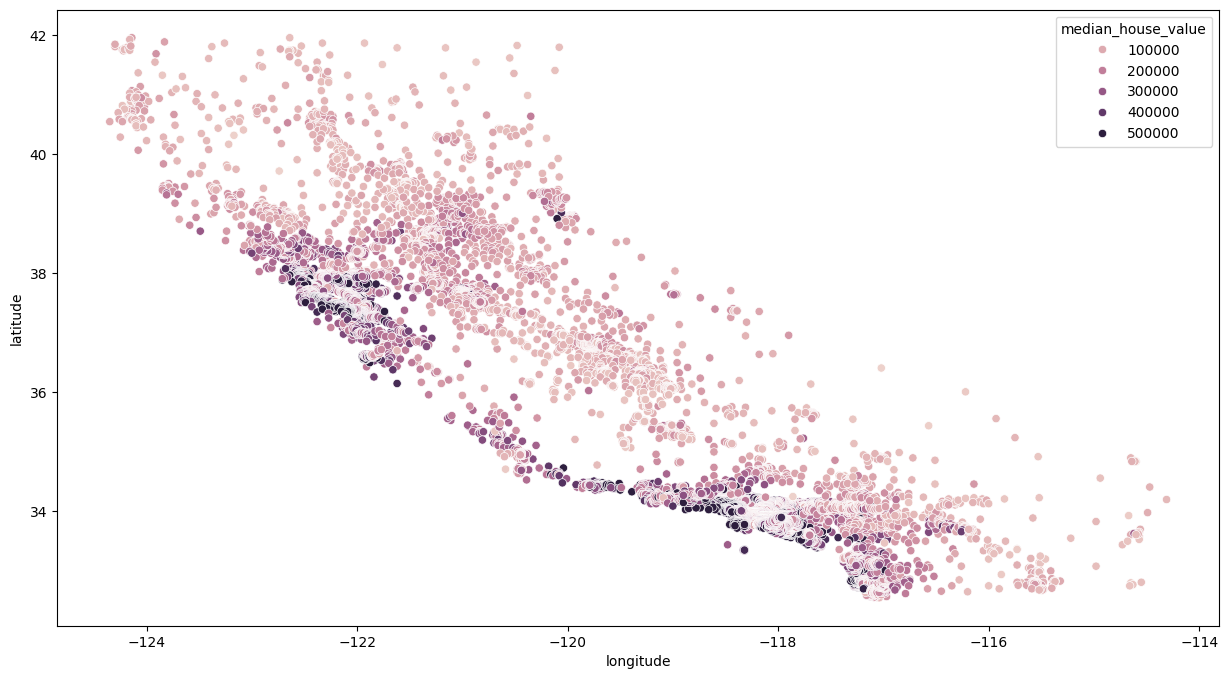

In [54]:
 plt.figure(figsize=(15, 8))
 sns.scatterplot(x="longitude", y="latitude", hue="median_house_value", data=temp)
 plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [56]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15610    -116.87     32.72                13.0       3268.0           491.0   
12478    -121.48     38.59                52.0       1186.0           341.0   
5996     -117.73     34.09                36.0       1543.0           297.0   
11827    -121.02     39.01                17.0       4786.0           799.0   
5183     -118.26     33.94                41.0       1510.0           410.0   
...          ...       ...                 ...          ...             ...   
13246    -117.63     34.12                 4.0       4323.0           775.0   
19844    -119.09     36.42                17.0        877.0           219.0   
9944     -122.26     38.16                23.0       2840.0           491.0   
10908    -117.86     33.74                 9.0        525.0           171.0   
2754     -115.49     32.67                24.0       1266.0           275.0   

       population  households  median_income  ocean

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [58]:
reg.fit(X_train, Y_train)

LinearRegression()

In [59]:
from sklearn import metrics
Y_pred = reg.predict(X_test)

print('Train Score: ', reg.score(X_train, Y_train))
print('Test Score: ', reg.score(X_test, Y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred, squared=False))

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Train Score:  0.6360917814865006
Test Score:  0.6415883892836369
Mean Absolute Error: 51201.82937013985
Mean Squared Error: 4799018937.42268
Root Mean Squared Error: 69274.95173165174
Coefficients: [-4.24119199e+04 -4.21570288e+04  1.13374296e+03 -7.69468009e+00
  1.13918732e+02 -3.62884861e+01  3.86543572e+01  3.99257499e+04
 -3.14845544e+03]
Intercept: -3550059.5520811346
